In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
df= pd.read_csv('/content/flipkart_com-ecommerce_sample.csv.zip')

In [3]:

df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:

df.shape

(20002, 15)

In [8]:
popular_products = pd.DataFrame(df.groupby('uniq_id')['product_rating'].count())
most_popular = popular_products.sort_values('product_rating', ascending=False)
most_popular.head(10)

,product_rating
uniq_id,
0001d5429cf08061039da491b1aad68d,1
aa245722694eaa35f066a8f52da8d969,1
aa34ab1d95d8bc9f85a40807c8bbdcd8,1
aa342a60ab0766c8e9c0e7f138cf0a3c,1
aa31427189b7ea42c02aacf58834e9aa,1
aa2e905de244291c13592642c3ad3c1d,1
aa2cb3b4e2f8380a7d9c8df5db7339b4,1
aa2c50c23e12e6028588ef309f32bf45,1
aa298c2d5ff90d0fe4b0cc6f33fa6aa7,1


<Axes: xlabel='uniq_id'>

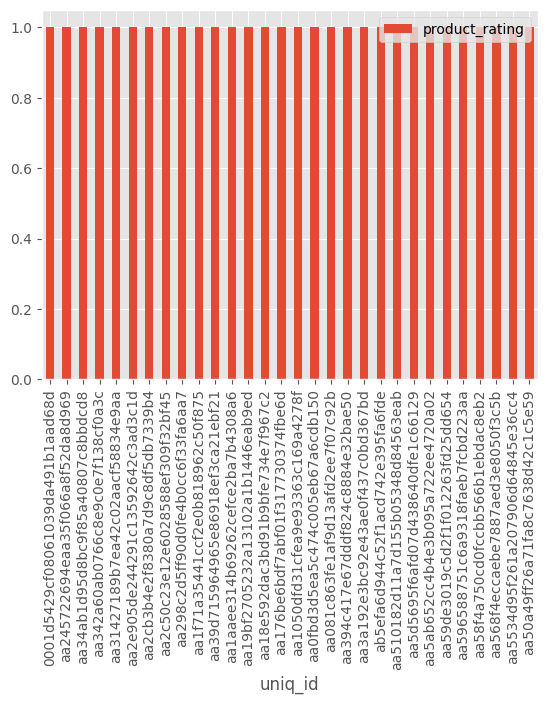

In [9]:

most_popular.head(30).plot(kind = "bar")

In [10]:

df1 = df.head(12000)

In [13]:

df1['product_rating'] = pd.to_numeric(df1['product_rating'], errors='coerce')
ratings_utility_matrix = df1.pivot_table(values='product_rating', index='overall_rating', columns='pid', fill_value=0)
ratings_utility_matrix.head()

<ipython-input-13-7661b7d5b767>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_rating'] = pd.to_numeric(df1['product_rating'], errors='coerce')


pid,ACCDCYB8NCGPEYEU,ACCDPDJVGNGNX7QE,ACCDRREFMB99QZ42,ACCDSUZJGMZD9FHZ,ACCDSY8EHJF6GRMG,ACCDVPGKY3GBDB5P,ACCDXF9HT5SHRYYE,ACCDXH5JWYYPBBGC,ACCDXH5JXWABF7GH,ACCDXZK5X7SKPZZT,...,WATEYUZXN2DHGZ36,WATEYUZXUHBBRZD6,WATEYUZXWKUESAYZ,WATEYY4X2SYPGHSX,WATEYY4XQ4GEP7HV,WBTDMEZTDSZGZEDJ,WBTDMEZTUWBPD5DM,WCKE2TFF4ZYGXUMH,WCKE2TFYRTHGTUTC,WCKEC8AG8EYWFSA7
overall_rating,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:

ratings_utility_matrix.shape

(34, 1122)

In [15]:

X = ratings_utility_matrix.T
X.head()

overall_rating,1,1.3,1.5,1.7,2,2.2,2.3,2.4,2.5,2.6,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5
pid,,,,,,,,,,,,,,,,,,,,,
ACCDCYB8NCGPEYEU,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCDPDJVGNGNX7QE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCDRREFMB99QZ42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCDSUZJGMZD9FHZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCDSY8EHJF6GRMG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:

X.shape

(1122, 34)

In [17]:

X1=X

In [18]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1122, 10)

In [19]:

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1122, 1122)

In [20]:
X.index[10]

'ACCDY6GTHNEAPHM3'

In [24]:

i = "ACCDY6GTHNEAPHM3"

product_name = list(X.index)
product_ID = product_name.index(i)
product_ID

10

In [25]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1122,)

In [26]:

Recommend = list(X.index[correlation_product_ID > 0.70])
Recommend.remove(i)

Recommend[0:9]

['ACCDPDJVGNGNX7QE',
 'ACCDXF9HT5SHRYYE',
 'ACCDYDY68JNBV4BZ',
 'ACCDYDY6DPCHAN7Y',
 'ACCE2SXDBTYNYYQ3',
 'ACCE87C2Q7Y7YARB',
 'BATDCG2BY234294F',
 'BBADR6BH7Y9CTAEH',
 'BBADVRPJYHHMUSFE']

In [27]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [29]:
import pandas as pd # Import pandas to work with DataFrames

# Load your product data (replace 'your_product_data.csv' with the actual file)
product = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv.zip')

product = product.dropna() # Now you can use product
product.shape
product.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [30]:

product = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv.zip')
product= product.dropna()
product1 = product.head(500)

In [32]:
import pandas as pd # Import pandas to work with DataFrames
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Load your product data (replace 'your_product_data.csv' with the actual file)
product = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv.zip')

product = product.dropna() # Now you can use product
product1 = product.head(500)

# Verify if 'review_content' column exists
print(product1.columns)

# If the column name is different, correct it below
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product1["description"]) # Replace 'description' with the actual column name if needed

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


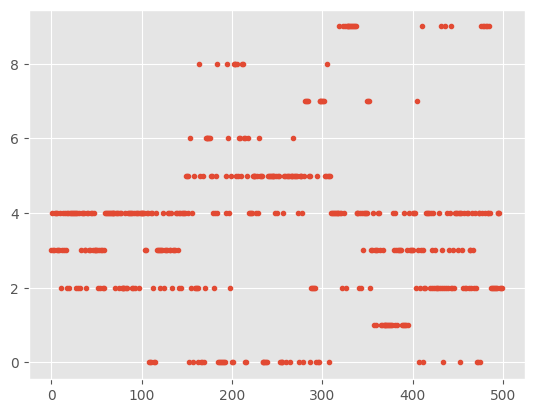

In [33]:


true_k = 10
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=42)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
plt.plot(y_kmeans, ".")
plt.show()

In [35]:


def print_cluster(cluster_id):
    print(f"Cluster {cluster_id}:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for ind in order_centroids[cluster_id, :10]:
        print(f' {terms[ind]}')
    print()

print("Top terms per cluster:")
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 diamond
 ring
 na
 like
 solitaire
 gold
 jewellery
 solitana
 flaunt
 marvel

Cluster 1:
 mug
 ceramic
 akup
 mugs
 coffee
 300
 mm
 ml
 safe
 clay

Cluster 2:
 casual
 sleeve
 women
 details
 printed
 solid
 fabric
 neck
 men
 shirt

Cluster 3:
 shorts
 details
 women
 kurta
 cycling
 solid
 straight
 synthetic
 gym
 clutch

Cluster 4:
 cm
 cover
 material
 color
 type
 inch
 features
 hair
 white
 model

Cluster 5:
 ring
 cash
 shipping
 kiara
 genuine
 delivery
 com
 flipkart
 free
 zirconia

Cluster 6:
 nishtaa
 rings
 bis
 hallmarked
 certified
 jewellery
 ring
 light
 gemstone
 silver

Cluster 7:
 aroma
 oil
 burner
 fragrance
 electric
 myesquire
 liquid
 freshener
 pot
 air

Cluster 8:
 pieces
 wearyourshine
 expressive
 newest
 curation
 jeweller
 expert
 keepsakes
 pc
 today

Cluster 9:
 charger
 usb
 cable
 battery
 warranty
 bulb
 furst
 led
 white
 adapter



In [36]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = kmeans.predict(Y)
    print_cluster(prediction[0])

In [37]:

user_input = input("Enter a product description for recommendations: ")
show_recommendations(user_input)

Enter a product description for recommendations: Tv
Cluster 4:
 cm
 cover
 material
 color
 type
 inch
 features
 hair
 white
 model

